In [2]:
from ultralytics import YOLO
from lib.lib_utils import Utils 
from pathlib import Path
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
import cv2

In [ ]:
#trasformazione .xyz to .png 
Utils.from_xyz_to_png(
    Path('/home/gabro/GrapheDetectProject/data.xyz/subset_xyz'), 
    Path('/home/gabro/GrapheDetectProject/dataset_imm_300'), 
    100)


In [ ]:
#divisione del dataset in train/ test/
#inserire percorso dataset da dividere e percentuale del test 
Utils.split_dataset('/home/gabro/GrapheDetectProject/data_yolo_new/', 0.2)   

In [3]:
# Load a model
# model = YOLO("yolov8n.yaml")  # build a new model from scratch
model = YOLO("/home/gabro/GrapheDetectProject/best_100_campioni_new.pt")  # load a pretrained model (recommended for training)


In [ ]:
# Use the model
# model.train(data="coco128.yaml", epochs=3)  # train the model
model.train(data="config_yolov8.yaml", epochs=100)  # train the model

In [ ]:
metrics = model.val()  # evaluate model performance on the validation set
results = model("/home/gabro/GrapheDetectProject/b74c9ce2-graphene_218641_bonds.png")  # predict on an image
success = model.export(format="onnx")  # export the model to ONNX format


image 1/1 /home/gabro/GrapheDetectProject/b74c9ce2-graphene_218641_bonds.png: 640x640 2 defects, 269.0ms
Speed: 2.0ms preprocess, 269.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


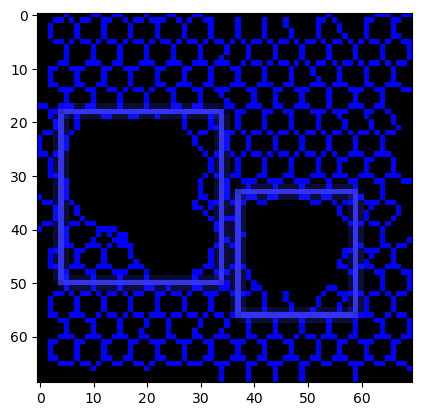

In [10]:
results = model("/home/gabro/GrapheDetectProject/b74c9ce2-graphene_218641_bonds.png")  # predict on an image
boxes = res[0].boxes

boxes[0].xyxy
#boxes[1].xywhn

res_plotted = results[0].plot(labels = False, line_width = 1)
plt.imshow(res_plotted)
plt.show()
